<a href="https://colab.research.google.com/github/ikemdinachi-alfred/Basic-calculator-Application/blob/main/Hotel_data_set_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two days ago my supervisor shared a dataset link with me from kaggle to analyse. i thought it wise to share the knowledge with data analyst lovers. Trust me its will interest you to find out insights i got from the dataset.
link: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# **About Dataset**

##**Context**

# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

# This hotel booking dataset can help you explore those questions!



# This Dataset contains 119390 columns and 32 rows for a City Hotel and a Resort Hotel. Each observation represent a hotel booking between the 1st of July 2015 and 31st August 2017, including booking that eventually arrived and booking that were canceled.

In [4]:
# import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load dataset
data = "hotel_bookings.csv"
df = pd.read_csv(data)
df.head()
# Load The first five row

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Load The last five row
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
# shape show the sum of the total row and columns
df.shape

(119390, 32)

In [11]:
# descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
# have to change reservation status date from object to date time

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [14]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [15]:
# view each column and the unique elements in them
counter = 1
for count in df.describe(include='object').columns:
  uniques = df[count].unique()
  print(counter,"-------> ",count, "\n\n", uniques, "\n",":"*75,"\n" )

  counter+=1


1 ------->  hotel 

 ['Resort Hotel' 'City Hotel'] 
 ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

2 ------->  arrival_date_month 

 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 
 ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

3 ------->  meal 

 ['BB' 'FB' 'HB' 'SC' 'Undefined'] 
 ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

4 ------->  country 

 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' '

In [16]:
# lets check for emelemnts with Missing values
df.isnull().sum()




hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# lets drop drop the columns with values
df.drop(['company','agent'], axis=1, inplace= True)
df.dropna(inplace= True)




In [17]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [44]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


# **DATA VISUALIZATION**





# **1. Reservation Staus**

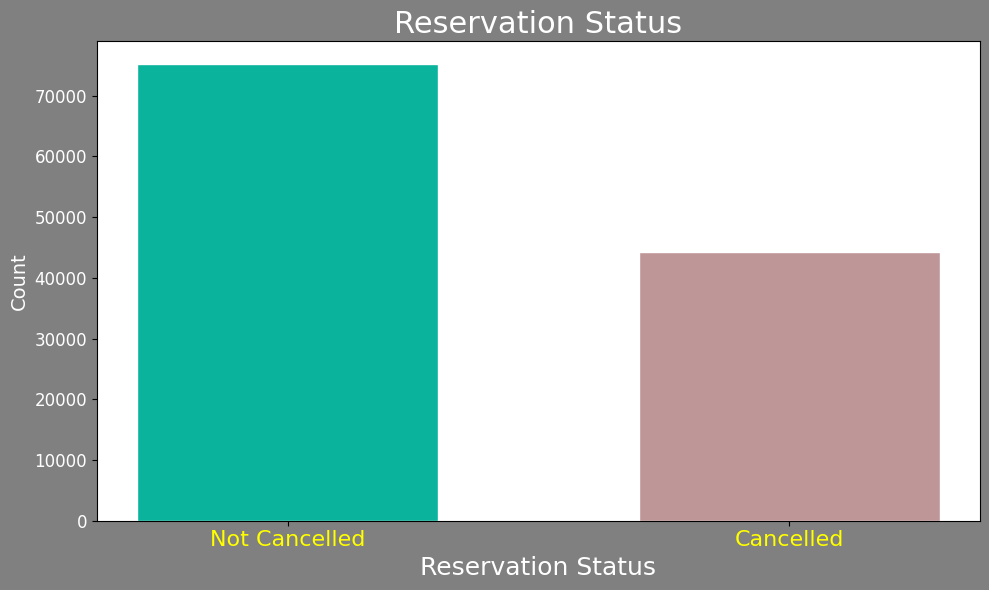

In [19]:

# choose colour
colors = sns.color_palette(['#09B39C', '#BF9697'])
# Calculate cancellation percentages
cancelled_perc = df['is_canceled'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(10, 6), facecolor='gray')
plt.title('Reservation Status', fontsize=22, color='white')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor='white', width=0.6, color=colors)
plt.xlabel('Reservation Status', fontsize=18, color='white')
plt.ylabel('Count', fontsize=14, color='white')
plt.xticks(fontsize=16, color='yellow')
plt.yticks(fontsize=12, color='white')
plt.tight_layout()
plt.savefig('reservation_status_plot.png', bbox_inches='tight', transparent=True)
plt.show()




# **Reservation status For Both City and Resort Hotel**

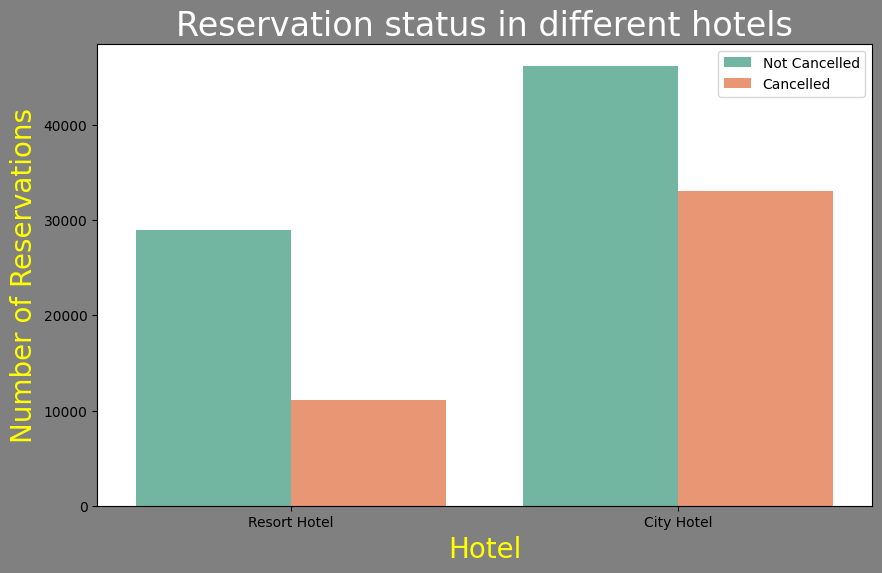

In [20]:
plt.figure(figsize=(10, 6), facecolor='gray')

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=24, color='white')
plt.xlabel('Hotel',color='yellow', size = 20)
plt.ylabel('Number of Reservations', color='yellow', size = 20)

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

# In Comparison to resort hotels, the City Hotels have more bookings this could be as a result of the following;
# 1. That resort hotels are more expensive while City hotels offers a wider range of options, from budget-friendly to luxury accommodations, catering to a broader audience.
# 2. City hotels could often be located in urban areas with better access to transportation, business districts, shopping centers, and entertainment options, making them more convenient for travelers.
# 3. City hotels could likly host more events, conventions, trade shows, and conferences, leading that meet potential customers needs.
# 4. Proximity to universities and educational institutions could drive more bookings from students, visiting professors, and parents for City hotel.

# **Monthly Reservation Staus**

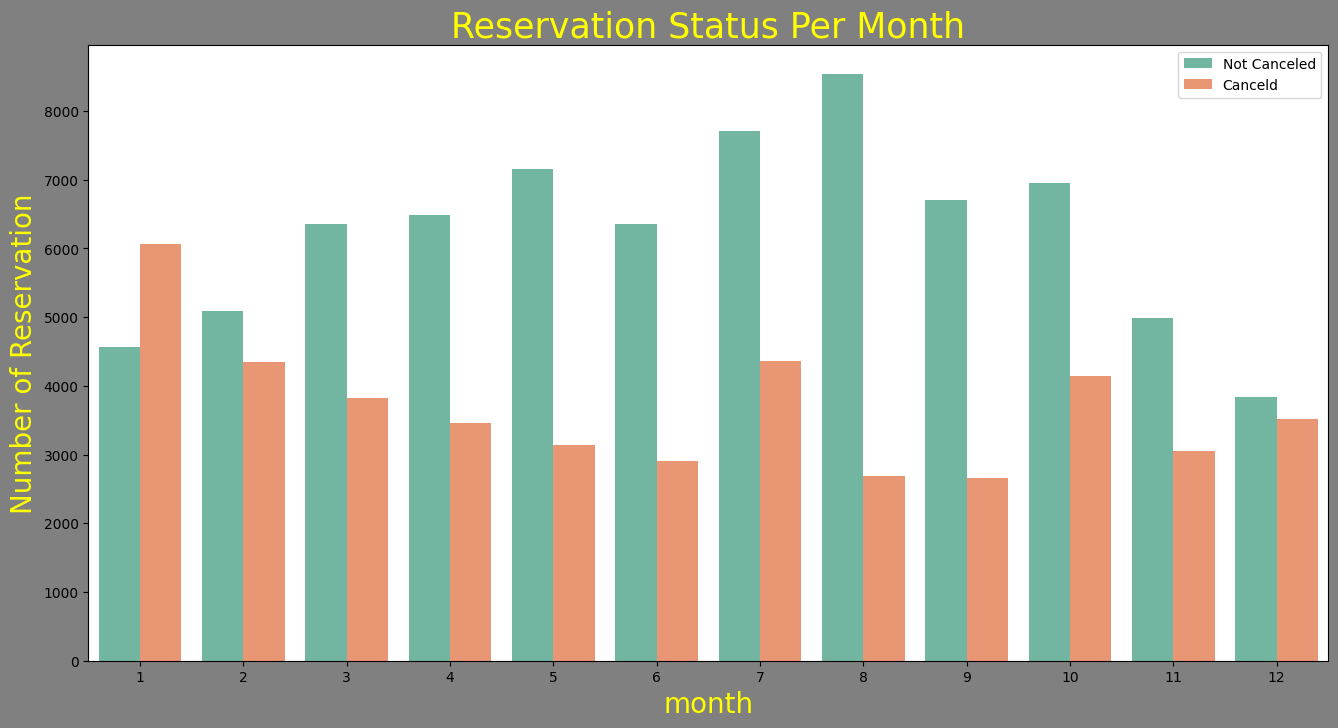

In [ ]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8), facecolor='gray')
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 25, color="yellow")
plt.xlabel('month', size= 20, color="yellow")
plt.ylabel('Number of Reservation',size= 20, color="yellow")
plt.legend(['Not Canceled','Canceld'])
plt.show()

# Across the months, its clear that the month of August have the highest bookings, unlike January with an evident high  rate of cancellations. This could be that because;
# 1. August is a popular month for vacations, particularly in the Northern Hemisphere, where it falls in the summer season. Families and individuals are more likely to take time off work and school to travel, leading to a higher number of bookings.
# 2. August is often the last opportunity for families to travel before the new school year begins. This urgency can result in higher commitment to travel plans and lower cancellation rates.
# 3. January follows the holiday season (December), a period of high spending and travel. Many people might be recuperating financially or physically from the holidays, leading to fewer bookings.
# 4. January marks the return to work and school after the holidays, resulting in less available time for travel. This return to routine can lead to fewer bookings and a higher likelihood of cancellations due to unexpected work or school commitments.

# **Month with Highest Weekends Nights and Week Nights**

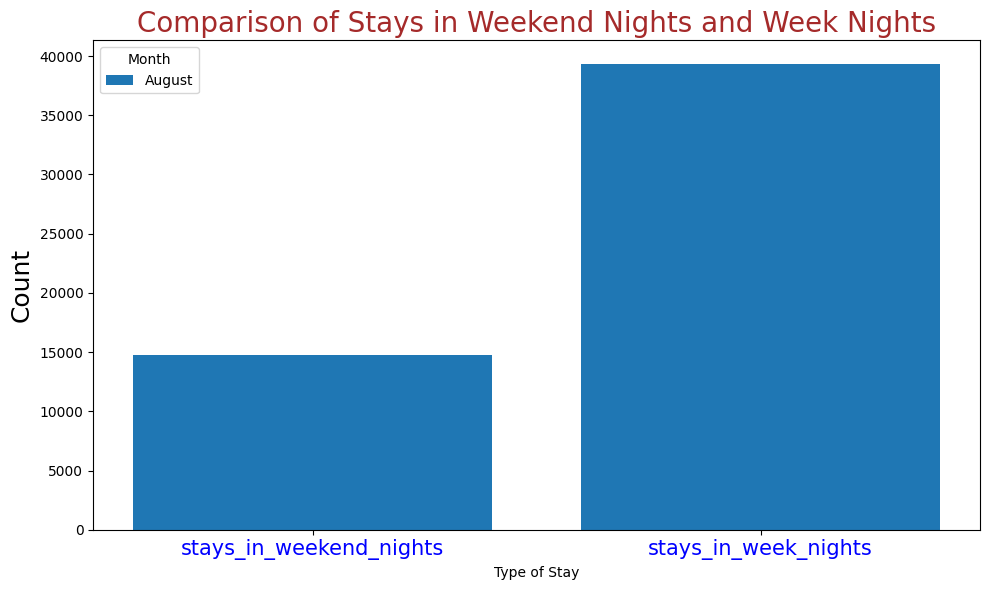

In [36]:
# Group by arrival_date_month and sum up the counts
monthly_stays = df.groupby('arrival_date_month')[['stays_in_weekend_nights', 'stays_in_week_nights']].sum()

# Find the month with the highest count for stays_in_weekend_nights and stays_in_week_nights
max_weekend_nights_month = monthly_stays['stays_in_weekend_nights'].idxmax()
max_week_nights_month = monthly_stays['stays_in_week_nights'].idxmax()

# Prepare data for plotting
plot_data = monthly_stays.loc[[max_weekend_nights_month, max_week_nights_month]].reset_index()
plot_data_melted = plot_data.melt(id_vars='arrival_date_month', value_vars=['stays_in_weekend_nights', 'stays_in_week_nights'], var_name='Type of Stay', value_name='Count')

# Plot histogram
plt.figure(figsize=(10, 6))

# Plotting the histogram
for key, grp in plot_data_melted.groupby('arrival_date_month'):
    plt.bar(grp['Type of Stay'], grp['Count'], label=key)

# Set title and labels
plt.title('Comparison of Stays in Weekend Nights and Week Nights', size= 20, color="brown")
plt.xlabel('Type of Stay')
plt.ylabel('Count', size=18)
plt.legend(title='Month')
plt.xticks(rotation=0, size=15,color="blue")
plt.tight_layout()

## Many hotels and travel agencies offer special promotions, discounts, and packages during the summer months to attract tourists. These deals can make travel in August more attractive. This could be the reason it became the month with highest stays in week and weekend night

# **The Top 4 Months with Highest Stay in Weekend Nights and Week Nights**

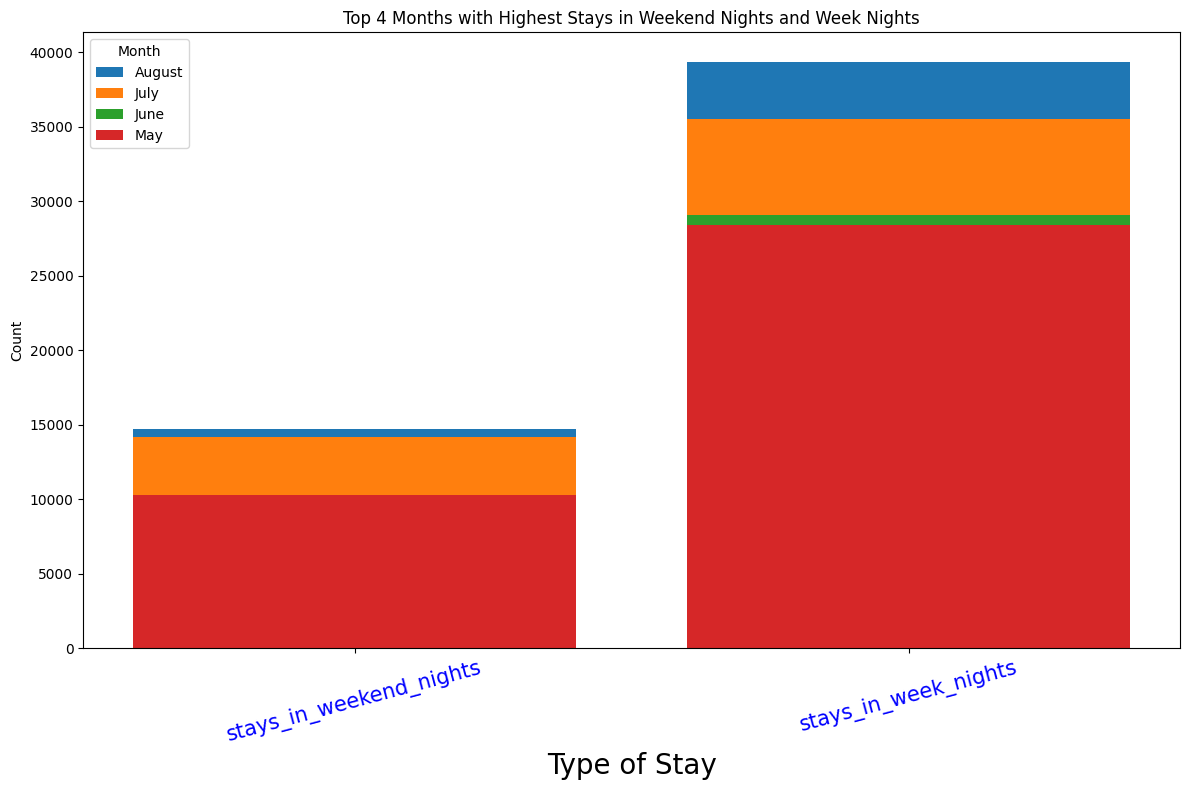

In [47]:
monthly_stays = df.groupby('arrival_date_month')[['stays_in_weekend_nights', 'stays_in_week_nights']].sum()

# Calculate the total stays (weekend + week nights) for each month
monthly_stays['total_stays'] = monthly_stays['stays_in_weekend_nights'] + monthly_stays['stays_in_week_nights']

# Find the top 4 months with the highest total stays
top_4_months = monthly_stays.nlargest(4, 'total_stays')

# Prepare data for plotting
plot_data = top_4_months.reset_index()
plot_data_melted = plot_data.melt(id_vars='arrival_date_month', value_vars=['stays_in_weekend_nights', 'stays_in_week_nights'], var_name='Type of Stay', value_name='Count')

# Plot histogram
plt.figure(figsize=(12, 8))

# Plotting the histogram
for key, grp in plot_data_melted.groupby('arrival_date_month'):
    plt.bar(grp['Type of Stay'], grp['Count'], label=key)

# Set title and labels
plt.title('Top 4 Months with Highest Stays in Weekend Nights and Week Nights')
plt.xlabel('Type of Stay', size=20)
plt.ylabel('Count')
plt.legend(title='Month')
plt.xticks(rotation=15, color="blue", size=15)
plt.tight_layout()

# Show plot
plt.show()

# **Based on the analysis, the reasons for August having the highest weekend and week nights stays could include:**

# 1. High Travel Demand: The peak vacation season drives up the demand for hotel stays.
# 2. Favorable Weather: Pleasant weather encourages more extended stays.
# 3. Special Events: Festivals and events in August attract more visitors.
# 4. Family Vacations: Families prefer traveling before the school year starts.
#5.  Promotional Offers: Discounts and deals during summer increase bookings.

# **Top 7 countries with reservation canceled**

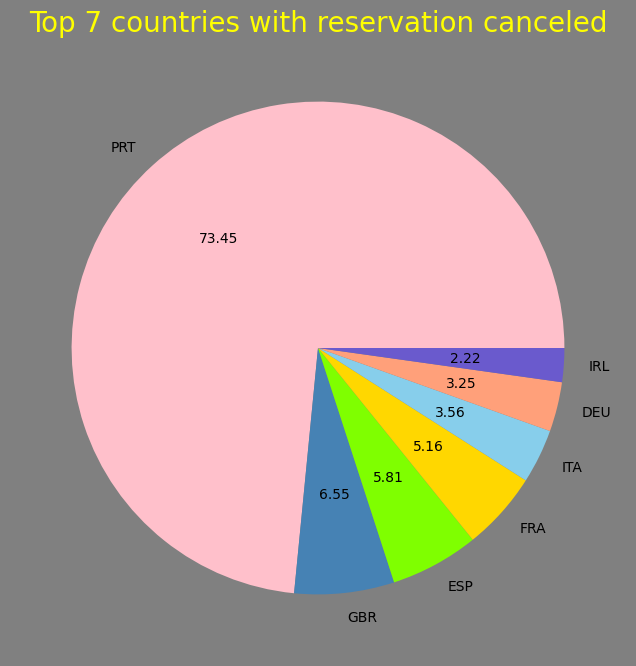

In [42]:
cancelled_data= df[df['is_canceled']==1]
top_7_country = cancelled_data['country'].value_counts()[:7]

# Custom colors for the pie chart
custom_colors = ['pink', '#4682B4', '#7FFF00', '#FFD700', '#87CEEB', '#FFA07A', '#6A5ACD', '#FF69B4', '#40E0D0', '#DAA520']

plt.figure(figsize=(10, 8), facecolor='gray')  # Set background color to a light brown
plt.title('Top 7 countries with reservation canceled', color="yellow", size=20)
plt.pie(top_7_country, autopct='%.2f', labels=top_7_country.index, colors=custom_colors)
plt.show()


# Economic instability or downturns in these countries may lead to higher cancellation rates as people become more cautious with their spending.

# **By understanding the reasons behind high cancellation rates, hotels can implement targeted strategies to reduce cancellations, such as:**

# 1. Offering flexible booking options with incentives for non-cancellation.
# 2. Enhancing communication and clarity on travel restrictions and policies.
# 3. Providing better travel insurance options to reduce speculative bookings.

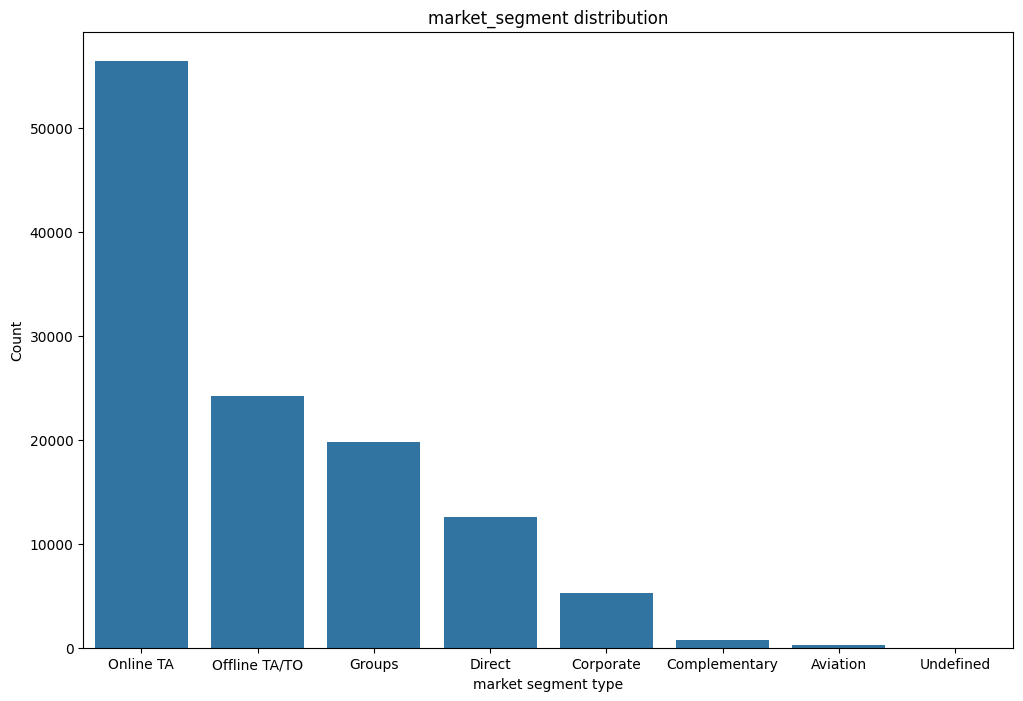

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(x='market_segment', data=df, order=df['market_segment'].value_counts().index)
plt.title('market_segment distribution')
plt.xlabel('market segment type')
plt.ylabel('Count')
plt.show()

# Let's analyze the sources from which guests are making hotel reservations, including Direct, Groups, Online Travel Agencies, and Offline Travel Agents.
# Approximately 46% of clients make reservations through online travel agencies, while 27% come through group bookings.
# A mere 4% of clients choose to book hotels directly by visiting them in person and making reservations.

# **Summary of Analysis**
# High Bookings in August:
###Peak Vacation Season: August is a popular month for travel due to summer vacations, favorable weather, and school holidays.
###Promotions and Events: Special promotions and numerous events/festivals during August contribute to higher booking rates.
# High Cancellation Rates by Country:
###Top Countries: PRT (Portugal), GBR (United Kingdom), ESP (Spain), FRA (France), ITA (Italy), DEU (Germany), and IRL (Ireland) have the highest cancellation rates.
###Economic and Cultural Factors: Economic instability, frequent travel restrictions, cultural attitudes towards planning, and extensive use of travel insurance contribute to high cancellation rates.

# **Recommendations for Improvement**
#1.  **Enhance Customer Experience:**

### **Flexible Booking Options:** Offer flexible booking policies with incentives for non-cancellation to attract and retain customers.
###**Clear Communication:** Improve communication regarding travel restrictions, policies, and event schedules to reduce uncertainty.

#2.  **Targeted Promotions and Discounts:**

###**Special Offers for Off-Peak Seasons:** Create attractive packages and discounts for months with lower bookings (e.g., January) to balance demand throughout the year.
###**Family-Friendly Packages:** Offer packages tailored to families, including activities and services that cater to family needs.

# **3. Optimize Marketing Strategies:**

### **Event-Based Marketing:** Align marketing campaigns with major events and festivals to attract tourists during these periods.
### **Localized Campaigns:** Tailor marketing campaigns to different countries based on cultural preferences and booking behaviors.